In [210]:
import random
import cv2

"""이미지 증강 함수"""

def image_augmentation(files, index, limit, image_width, image_height):
    random_files = []
    X_array =[]
    y_array = []
    images = []
    data = []
    
#     print('파일 리스트')
#     print(files)
    
    while True:
        try:
            random_files.append(random.choice(files))
            file = random_files[-1]
            print('선택된 파일')
            print(file)

            img_bgr = cv2.imread(file , cv2.IMREAD_COLOR)
            img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img_rgb, (image_width, image_height))
            
#             img90 =  cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)  # 시계 방향으로 90도 회전
#             img180 =  cv2.rotate(img, cv2.ROTATE_180)  # 180도 회전
#             img270 =  cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) # 반시계 방향 90도 회전

            images.append(img)
            images.append(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE))  # 시계 방향으로 90도 회전
            images.append(cv2.rotate(img, cv2.ROTATE_180))  # 180도 회전
            images.append(cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)) # 반시계 방향 90도 회전
            
            for image in images:
                data = np.asarray(image)
                X_array.append(data)
                y_array.append(index)
        
            if len(X_array) >= limit:
                break
        
        except Exception as e:
            print(e)
            print(str(i)+" 번째에서 에러 ")
            #             remove(f)
        pass 
    

    
    return X_array, y_array

In [217]:
import random

"""이미지 뽑기 함수"""

def image_selector(files, index, limit, image_width, image_height):
    random_files = []
    X_array = []
    y_array = []
    data = []
    
    for i in range(limit):
        random_files.append(random.choice(files))
#     print(random_files)
    
    for i, f in enumerate(random_files):
        try:
            img_bgr = cv2.imread(f, cv2.IMREAD_COLOR)
            image_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
            img = cv2.resize(image_rgb, (image_width, image_height))

            data = np.asarray(img)
            #Y는 0 아니면 1이니까 index값으로 넣는다.

            X_array.append(data)
            y_array.append(index)

        except Exception as e:
            print(e)
            print(str(i)+" 번째에서 에러 ")
    #             remove(f)
            pass 
            
    return X_array, y_array

In [218]:
import os, glob

"""하위 폴더 및 파일 탐색"""
    
def is_dir_file(dir_path, dir_list, img_limit, img_limit_list):
    
    folders = os.listdir(dir_path)
    
    for folder in folders:
        path_detail = os.path.join(dir_path, folder)
        
        if os.path.isdir(path_detail):
            new_img_limit = int(img_limit / len(folders))
            
            is_dir_file(path_detail, dir_list, new_img_limit, img_limit_list)
        else:    
            print(dir_path + ' img limit : ' + str(img_limit))
            dir_list.append(dir_path)
            img_limit_list.append(img_limit)
            return

In [219]:
#본 코드 시작

# from PIL import Image
# import glob, sys, numpy as np
# from  keras.utils import np_utils

import cv2
import os, glob
from os import remove
import numpy as np

img_dir = './binary_cnn/train'
# categories = ['ad', 'non_ad']
categories = os.listdir(img_dir)

sum = 0
ad_index = 0
non_ad_index = 1
image_width, image_height = 128, 128

# file_directory = []
file_list_index = []
img_limit_list = []
X = []
y = []


np_classes = len(categories)    
print(categories)

for i, category in enumerate(categories):
    file_directory = []
    img_dir_detail = os.path.join(img_dir, category)
    
    if i == ad_index:
        img_limit = 1600
    elif i == non_ad_index:
        img_limit = 1600
        
    is_dir_file(img_dir_detail, file_directory, img_limit, img_limit_list)
    
    for directory in file_directory:
        file_list_index.append([i, directory])
#     file_list_index.append([i, file_directory])
    
# print(file_directory)
print(file_list_index)

for lst in file_list_index:
#     print(lst)
    print(lst[0])

count = 0

# for (index, directories) in file_list_index:
for index, directory in file_list_index:
#     for directory in directories:
    print(directory)
    files = glob.glob(directory + "/*.jpg")
    len_file = len(files)

#     if index == ad_index:
#         img_limit = 20
#     elif index == non_ad_index:
#         img_limit = 100

    img_limit = img_limit_list[count]

    if len_file <img_limit:
        X_temp, y_temp = image_augmentation(files, index, img_limit, image_width, image_height)
    else:
        X_temp, y_temp = image_selector(files, index, img_limit, image_width, image_height)

#         X.__add__(X_temp)
#         y.__add__(y_temp)

    X = X + X_temp
    y = y + y_temp

    len_file = len(X_temp)
    print(directory + '파일 길이 : ' + str(len_file))
    sum += len_file
    count += 1
        
    
print('총 파일 길이 : ' + str(sum))

X = np.array(X)
Y = np.array(y)

print(len(X), len(Y))

"""이미지 크기 인자를 조절하면서 적용"""

['ad', 'non_ad']
./binary_cnn/train\ad\bill\classification\1 img limit : 72
./binary_cnn/train\ad\bill\non_classification img limit : 72
./binary_cnn/train\ad\coin\1 img limit : 145
./binary_cnn/train\ad\general_product\classification\1 img limit : 72
./binary_cnn/train\ad\general_product\non_classification img limit : 72
./binary_cnn/train\ad\graph\classification\1 img limit : 72
./binary_cnn/train\ad\graph\non_classification img limit : 72
./binary_cnn/train\ad\human\1 img limit : 29
./binary_cnn/train\ad\human\2 img limit : 29
./binary_cnn/train\ad\human\3 img limit : 29
./binary_cnn/train\ad\human\4 img limit : 29
./binary_cnn/train\ad\human\ambiguous_data img limit : 29
./binary_cnn/train\ad\lotto_N\1 img limit : 145
./binary_cnn/train\ad\lotto_P\1 img limit : 145
./binary_cnn/train\ad\microbe\1 img limit : 145
./binary_cnn/train\ad\part_of_human\1 img limit : 29
./binary_cnn/train\ad\part_of_human\2 img limit : 29
./binary_cnn/train\ad\part_of_human\3 img limit : 29
./binary_cnn/

./binary_cnn/train\ad\part_of_human\3파일 길이 : 29
./binary_cnn/train\ad\part_of_human\4
./binary_cnn/train\ad\part_of_human\4파일 길이 : 29
./binary_cnn/train\ad\part_of_human\ambiguous_data
./binary_cnn/train\ad\part_of_human\ambiguous_data파일 길이 : 29
./binary_cnn/train\ad\photoshop\classification\1
./binary_cnn/train\ad\photoshop\classification\1파일 길이 : 18
./binary_cnn/train\ad\photoshop\classification\2
./binary_cnn/train\ad\photoshop\classification\2파일 길이 : 18
./binary_cnn/train\ad\photoshop\classification\3
./binary_cnn/train\ad\photoshop\classification\3파일 길이 : 18
./binary_cnn/train\ad\photoshop\classification\4
./binary_cnn/train\ad\photoshop\classification\4파일 길이 : 18
./binary_cnn/train\ad\photoshop\non_classification
선택된 파일
./binary_cnn/train\ad\photoshop\non_classification\82.jpg
선택된 파일
./binary_cnn/train\ad\photoshop\non_classification\1.jpg
선택된 파일
./binary_cnn/train\ad\photoshop\non_classification\82.jpg
선택된 파일
./binary_cnn/train\ad\photoshop\non_classification\2.jpg
선택된 파일
./bina

'이미지 크기 인자를 조절하면서 적용'

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

print(X_train.shape)
print(X_train.shape[0])
print(y_train.shape)
print(y_test.shape)
print(np.bincount(y_train))
print(np.bincount(y_test))

(2580, 128, 128, 3)
2580
(2580,)
(860,)
[1341 1239]
[475 385]


In [197]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [198]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [199]:
# import os




# with K.tf_ops.device('/device:GPU:0'):
model = Sequential()

model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
#     model_dir = 'C:\\Users\\kimkm\\광고\\model'
#     if not os.path.exists(model_dir):
#         os.mkdir(model_dir)
#     model_path = model_dir + "\\ad_non_ad_classify.model"
    
#     checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
#     early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [200]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 64)       

In [201]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.15, verbose=1)

Epoch 1/20
35/35 [==============================] - 19s 538ms/step - loss: 0.5610 - accuracy: 0.7328 - val_loss: 0.6033 - val_accuracy: 0.6382
Epoch 2/20
35/35 [==============================] - 21s 593ms/step - loss: 0.1939 - accuracy: 0.9270 - val_loss: 1.8772 - val_accuracy: 0.5168
Epoch 3/20
35/35 [==============================] - 21s 596ms/step - loss: 0.0838 - accuracy: 0.9767 - val_loss: 2.9187 - val_accuracy: 0.5168
Epoch 4/20
35/35 [==============================] - 21s 609ms/step - loss: 0.0442 - accuracy: 0.9863 - val_loss: 3.2678 - val_accuracy: 0.5168
Epoch 5/20
35/35 [==============================] - 22s 636ms/step - loss: 0.0239 - accuracy: 0.9945 - val_loss: 4.2448 - val_accuracy: 0.5168
Epoch 6/20
35/35 [==============================] - 21s 597ms/step - loss: 0.0179 - accuracy: 0.9973 - val_loss: 3.8290 - val_accuracy: 0.5168
Epoch 7/20
35/35 [==============================] - 21s 597ms/step - loss: 0.0248 - accuracy: 0.9918 - val_loss: 3.6360 - val_accuracy: 0.5168

In [202]:
y_pred = model.predict(X_test)
y_pred = np.around(y_pred)
print(y_pred.shape)
print(y_pred)

(860, 1)
[[0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 

In [203]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print('confusion matrix 결과')
print(confusion_matrix(y_test, y_pred, labels=[0, 1])) # 0 : 광고 1: 비광고

print('precision 개별값')
print(list(map('{:2.2f}%'.format, precision_score(y_test, y_pred, average=None) * 100))) # precision 개별 값
print('recall 개별값')
print(list(map('{:2.2f}%'.format, recall_score(y_test, y_pred, average=None) * 100)))

print('precision 평균값')
print('{:2.2f}%'.format(precision_score(y_test, y_pred, average='macro') * 100)) # precision 평균 값
print('recall 평균값')
print('{:2.2f}%'.format(recall_score(y_test, y_pred, average='macro') * 100))

confusion matrix 결과
[[472   3]
 [  0 385]]
precision 개별값
['100.00%', '99.23%']
recall 개별값
['99.37%', '100.00%']
precision 평균값
99.61%
recall 평균값
99.68%


In [204]:
# print("정확도 : %.2f " %(model.evaluate(X_test, y_test)[1]))
print("정확도 : " '{:2.2f}%'.format(model.evaluate(X_test, y_test)[1] * 100))

27/27 [==============================] - 2s 83ms/step - loss: 0.0230 - accuracy: 0.9965
정확도 : 99.65%


In [205]:
model.save("./binary_model_saved.h5")

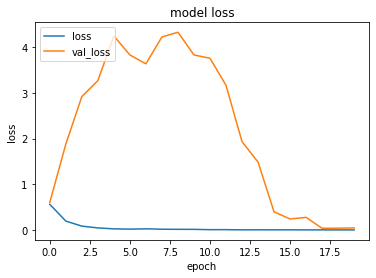

In [206]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

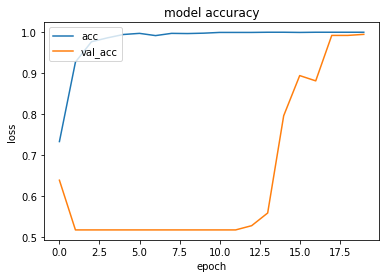

In [207]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'] )
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

In [208]:
# from PIL import Image
# #import Image
# import os, glob, numpy as np
# from tensorflow.keras.models import load_model

# import tensorflow as tf

# seed = 5
# tf.random.set_seed(seed)
# np.random.seed(seed)

# caltech_dir = 'C:\\Users\\kimkm\\광고\\test'


# image_w = 64
# image_h = 64

# pixels = image_h * image_w * 3

# X = []
# filenames = []
# files = glob.glob(caltech_dir+"/*.jpg")
# for i, f in enumerate(files):
#     img = Image.open(f)
#     img = img.convert("RGB")
#     img = img.resize((image_w, image_h))
#     data = np.asarray(img)

#     filenames.append(f)
#     X.append(data)
    
# X = np.array(X)
# X = X.astype(float) / 255

# model = load_model('C:\\Users\\kimkm\\광고\\model\\ad_non_ad_classify.model')


# prediction = model.predict(X)
# np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) # 소수점 3자리까지
# cnt = 0
# for i in prediction:
#     if i >= 0.5: print("해당 " + filenames[cnt].split("\\")[4] + filenames[cnt].split("\\")[5] + "  이미지는 비광고 로 추정됩니다.")
#     else : print("해당 " + filenames[cnt].split("\\")[4] + filenames[cnt].split("\\")[5] + "  이미지는 광고 로 추정됩니다.")
#     cnt += 1